# Exemplo

http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

In [12]:
from itertools import product

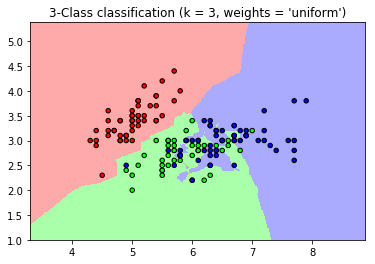

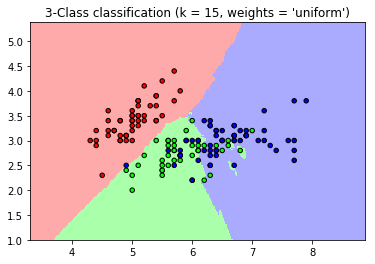

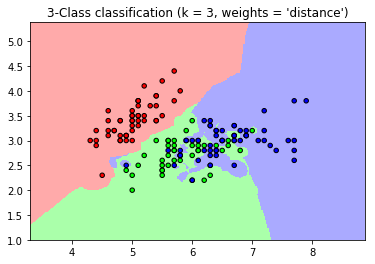

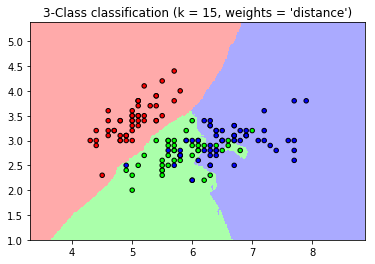

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights, n_neighbors in product(['uniform', 'distance'], [3, 15]):
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    # NÃO CONFUNDIR ESSE y COM O TARGET!!!!
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

# GridSearch

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pprint

In [24]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3)

In [33]:
param_grid = {'n_neighbors': [3, 5, 10],
              'weights': ['distance', 'uniform'],
              'p': [1, 2, 3, 4]}

knn = neighbors.KNeighborsClassifier()

cv = GridSearchCV(knn, param_grid)

cv.fit(X_train, y_train)

clf = cv.best_estimator_
clf.fit(X_train, y_train)

pprint.pprint(clf.get_params())
print()
print(classification_report(clf.predict(X_test), y_test))

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'distance'}

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.94      1.00      0.97        15
          2       1.00      0.93      0.96        14

avg / total       0.98      0.98      0.98        45



# KNeighbors Graph

In [52]:
from sklearn.neighbors import kneighbors_graph, NearestNeighbors
import pandas as pd
import seaborn as sns
%matplotlib inline

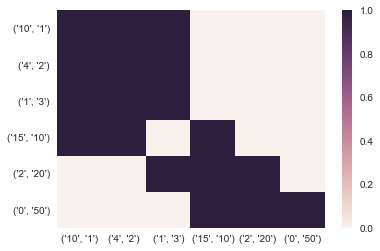

In [49]:
X = np.array([[10, 1], [4, 2], [1, 3], [15, 10], [2, 20], [0, 50]])

nn = NearestNeighbors(n_neighbors=3).fit(X)

X_nn_graph = nn.kneighbors_graph(X).toarray()

sns.heatmap(pd.DataFrame(X_nn_graph, 
             columns=X.astype('str'),
             index=X.astype('str')))

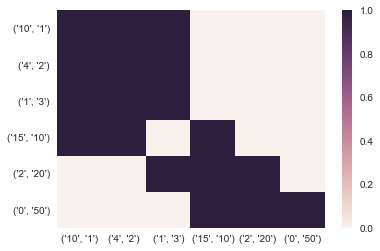

In [54]:
X = np.array([[10, 1], [4, 2], [1, 3], [15, 10], [2, 20], [0, 50]])

X_nn_graph = kneighbors_graph(X, n_neighbors=3, 
                              include_self=True, 
                              mode='connectivity').toarray()

sns.heatmap(pd.DataFrame(X_nn_graph, 
             columns=X.astype('str'),
             index=X.astype('str')))